<a href="https://colab.research.google.com/github/kemaladamr/ML_with_sklearn/blob/main/DecisionTree_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

In [ ]:
df['target'] = pd.Series(
    iris.target
)

In [ ]:
df['target_names'] = df['target'].apply(lambda y: iris.target_names[y])

In [ ]:
# print df.sample(n=6)
df.sample(n=6, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3)

In [ ]:
print(df_train.shape[0], df_test.shape[0])

105 45


In [ ]:
print(df_train.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')


In [ ]:
x_train = df_train[iris.feature_names]
x_test = df_test[iris.feature_names]

y_train = df_train['target']
y_test = df_test['target']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [ ]:
pd.DataFrame(
    {
        'feature_names': iris.feature_names,
        'feature_importances': clf.feature_importances_
    }
).sort_values(
    'feature_importances', ascending=False
).set_index('feature_names')

,feature_importances
feature_names,
petal width (cm),0.869710
petal length (cm),0.085968
sepal width (cm),0.035743
sepal length (cm),0.008578


In [ ]:
# displaying internal tree decision
from sklearn.tree import export_text
print(
    export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1)
)

|--- petal width (cm) <= 0.8
|   |--- class: 0
|--- petal width (cm) >  0.8
|   |--- petal width (cm) <= 1.7
|   |   |--- petal length (cm) <= 5.0
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.0
|   |   |   |--- sepal length (cm) <= 6.0
|   |   |   |   |--- sepal width (cm) <= 2.5
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  2.5
|   |   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.0
|   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.7
|   |   |--- petal length (cm) <= 4.9
|   |   |   |--- sepal width (cm) <= 3.1
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.1
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.9
|   |   |   |--- class: 2



In [ ]:
# a lis to store accuracy score from each iteration
accuracy_scores = []

In [ ]:
for _ in range(100):
  # at each iteration freshly split the data
  df_train, df_test = train_test_split(df, test_size=0.3)
  x_train = df_train[iris.feature_names]
  x_test = df_test[iris.feature_names]

  y_train = df_train['target']
  y_test = df_test['target']

  # then create a new classifier
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  # finally append the score to the list
  accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

In [ ]:
# convert accuracy_score to a Series for stat
accuracy_scores = pd.Series(accuracy_scores)

In [ ]:
%matplotlib inline

Average Score: 0.948 [5th percentile: 0.889 & 95th percentile: 1.0


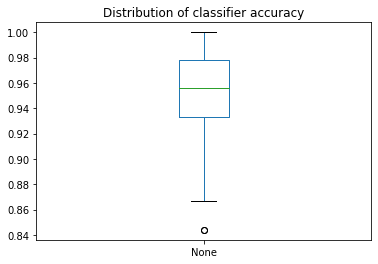

In [ ]:
accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box'
)

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95)
    )
)

In [ ]:
# shufflesplit
from sklearn.model_selection import ShuffleSplit

accuracy_scores = []

# create shuffle split instance
rs = ShuffleSplit(n_splits=100, test_size=0.3)

# get 100 pairs of indices
for train_index, test_index in rs.split(df):

  x_train = df.loc[train_index, iris.feature_names]
  x_test = df.loc[test_index, iris.feature_names]

  y_train = df.loc[train_index, 'target']
  y_test = df.loc[test_index, 'target']

  clf = DecisionTreeClassifier()

  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores = pd.Series(accuracy_scores)

Average Score: 0.943 [5th percentile: 0.889 & 95th percentile: 1.0


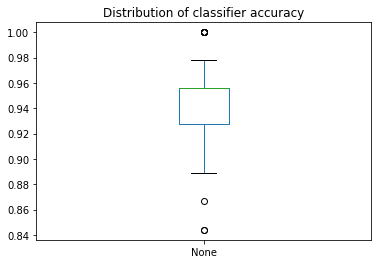

In [ ]:
accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box'
)

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95)
    )
)

In [ ]:
# cross validate
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=0.3)

x = df[iris.feature_names]
y = df['target']

cv_results = cross_validate(
    clf, x, y, cv=rs, scoring='accuracy'
)

accuracy_scores = pd.Series(cv_results['test_score'])

Average Score: 0.948 [5th percentile: 0.889 & 95th percentile: 1.0


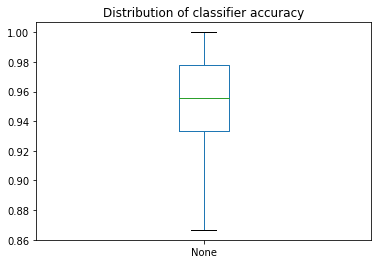

In [ ]:
accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box'
)

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95)
    )
)

In [ ]:
# tuning hyperparameter

for max_depth in [1, 2, 3, 4]:
  # initialize a new classifier each iteration with different max_depth
  clf = DecisionTreeClassifier(max_depth=max_depth)
  
  # initialize shuffle splitter
  rs = ShuffleSplit(n_splits=20, test_size=0.25)

  cv_results = cross_validate(
      clf, x_train, y_train, cv=rs, scoring='accuracy'
  )
  accuracy_scores = pd.Series(cv_results['test_score'])

  print(
      '@ max_depth = {}: accuracy_scores: {}~{}'.format(
          max_depth,
          accuracy_scores.quantile(.1).round(3),
          accuracy_scores.quantile(.9).round(3)
      )
  )

@ max_depth = 1: accuracy_scores: 0.519~0.744
@ max_depth = 2: accuracy_scores: 0.885~0.963
@ max_depth = 3: accuracy_scores: 0.926~1.0
@ max_depth = 4: accuracy_scores: 0.889~0.963


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


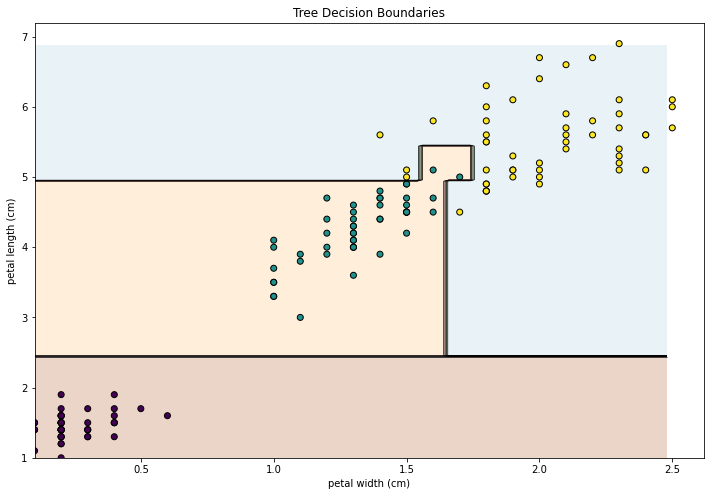

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, x, y):

  feature_names = x.columns
  x, y = x.values, y.values

  x_min, x_max = x[:,0].min(), x[:,0].max()
  y_min, y_max = x[:,1].min(), x[:,1].max()

  step = 0.02

  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, step),
      np.arange(y_min, y_max, step)
  )

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(12,8))
  plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
  plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
  plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
  plt.title("Tree Decision Boundaries")
  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])

x = df[['petal width (cm)', 'petal length (cm)']]
y = df['target']

clf = DecisionTreeClassifier()
clf.fit(x,y)

plot_decision_boundary(clf, x, y)

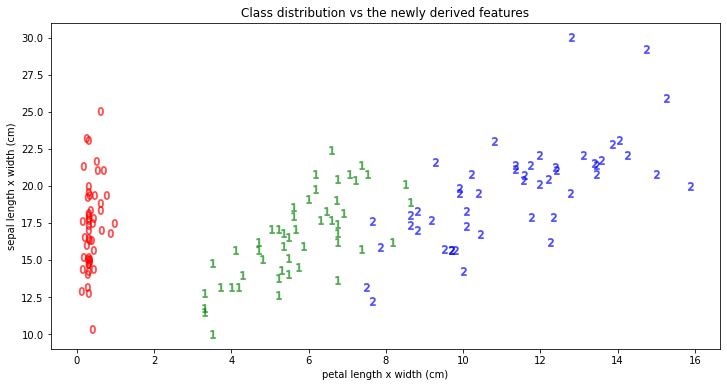

In [ ]:
df['petal length x width (cm)'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal length x width (cm)'] = df['sepal length (cm)'] * df['sepal width (cm)']

fig, ax = plt.subplots(1, 1, figsize=(12, 6));

h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'

for c in df['target'].value_counts().index.tolist():
  df[df['target']==c].plot(
      title='Class distribution vs the newly derived features',
      kind='scatter',
      x=h_label,
      y=v_label,
      color=['r','g','b'][c], # Each class get different color
      marker=f'${c}$', # Use class id as marker
      s=64,
      alpha=0.5,
      ax=ax
  )

fig.show()

In [ ]:
features_orig = iris.feature_names
features_new = ['petal length x width (cm)', 'sepal length x width (cm)']

accuracy_scores_orig = []
accuracy_scores_new = []

for _ in range(500):

  df_train, df_test = train_test_split(df, test_size=0.3)

  x_train_orig = df_train[features_orig]
  x_test_orig = df_test[features_orig]
  
  x_train_new = df_train[features_new]
  x_test_new = df_test[features_new]
  
  y_train = df_train['target']
  y_test = df_test['target']

  clf_orig = DecisionTreeClassifier(max_depth=2)
  clf_new = DecisionTreeClassifier(max_depth=2)

  clf_orig.fit(x_train_orig, y_train)
  clf_new.fit(x_train_new, y_train)

  y_pred_orig = clf_orig.predict(x_test_orig)
  y_pred_new = clf_new.predict(x_test_new)

  accuracy_scores_orig.append(round(accuracy_score(y_test, y_pred_orig),
                                    3))
  accuracy_scores_new.append(round(accuracy_score(y_test, y_pred_new),
                                   3))

accuracy_scores_orig = pd.Series(accuracy_scores_orig)
accuracy_scores_new = pd.Series(accuracy_scores_new)

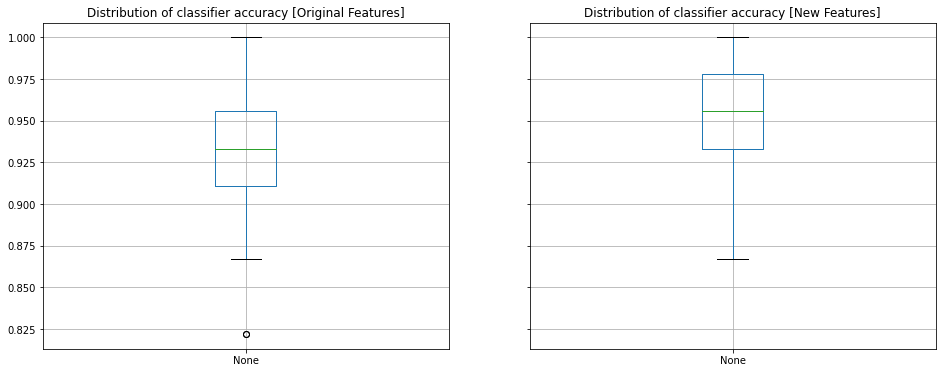

In [ ]:
figs, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True);

accuracy_scores_orig.plot(
    title='Distribution of classifier accuracy [Original Features]',
    kind='box',
    grid=True,
    ax=axs[0]
)

accuracy_scores_new.plot(
    title='Distribution of classifier accuracy [New Features]',
    kind='box',
    grid=True,
    ax=axs[1]
)

fig.show()

In [ ]:
# Predicting people's height
# 200 samples needed from each
n = 200

# from each population we get 200 male and 200 female samples
height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

In [ ]:
# group all females together and all males together
height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

In [ ]:
df_height = pd.DataFrame(
    {
        'Gender': [1 for i in range(height_f.size)] +
                  [2 for i in range(height_m.size)],
        'Height': np.concatenate((height_f, height_m))
    }
)

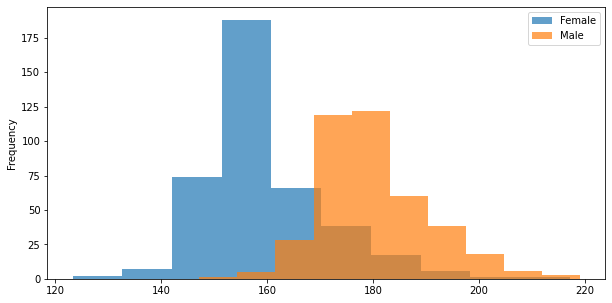

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df_height[df_height['Gender']==1]['Height'].plot(
    label='Female', kind='hist',
    bins=10, alpha=0.7, ax=ax
)
df_height[df_height['Gender']==2]['Height'].plot(
    label='Male', kind='hist',
    bins=10, alpha=0.7, ax=ax
)

ax.legend()
fig.show()

In [ ]:
df_height.groupby('Gender')[['Height']].agg([np.mean, np.median]).round(1)

Height       
         mean median
Gender              
1       159.4  156.7
2       180.3  178.8

In [ ]:
df_train, df_test = train_test_split(df_height, test_size=0.3)
x_train, x_test = df_train[['Gender']], df_test[['Gender']]
y_train, y_test = df_train['Height'], df_test['Height']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

for criterion in ['squared_error', 'absolute_error']:
  rgrsr = DecisionTreeRegressor(criterion=criterion)
  rgrsr.fit(x_train, y_train)

  print(f'criterion={criterion}:\n')
  print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))
  # regressor's evaluation
  y_pred = rgrsr.predict(x_test)
  print('MSE:', mean_squared_error(y_test, y_pred))
  print('MAE:', mean_absolute_error(y_test, y_pred), '\n')

criterion=squared_error:

|--- Gender <= 1.5
|   |--- value: [159.0]
|--- Gender >  1.5
|   |--- value: [180.7]

MSE: 126.03985078208736
MAE: 8.17620899536731 

criterion=absolute_error:

|--- Gender <= 1.5
|   |--- value: [156.7]
|--- Gender >  1.5
|   |--- value: [178.8]

MSE: 131.13892531281985
MAE: 8.026740852582906 



In [ ]:
# setting sample weights

rgrsr = DecisionTreeRegressor(criterion='squared_error')
sample_weight = y_train.apply(lambda h: 10 if h > 150 else 1)
rgrsr.fit(x_train, y_train, sample_weight=sample_weight)
print('Emphasis on "below 150":\n')
print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))

Emphasis on "below 150":

|--- Gender <= 1.5
|   |--- value: [161.1]
|--- Gender >  1.5
|   |--- value: [180.8]



In [ ]:
sample_weight = y_train.apply(lambda h: 10 if h <= 150 else 1)
rgrsr.fit(x_train, y_train, sample_weight=sample_weight)
print('Emphasis on "above 150":\n')
print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))

Emphasis on "above 150":

|--- Gender <= 1.5
|   |--- value: [151.2]
|--- Gender >  1.5
|   |--- value: [179.7]

